# Theories of the Hadley circulation

## Motivation

So far we've seen that the atmospheric circulation in the low latitudes is dominated by the zonally-symmetric overturning, while away from the equator the eddies tend to dominate.

We've seen that there is a seamless transport of energy from the equator to the poles, despite the fact that the dominant transport mechanism changes from the MMC in the tropics to transient eddies in mid-latitudes.

Some questions we'd like to get physical insight into:

- What determines the strength of the Hadley circulation?
- What determines the meridional extend of the Hadley circulation?
- Can the Hadley circulation exist in the absence of eddies?
- What roles are played by differential heating and eddies in the maintenance of the Hadley circulation?

To start to answer these questions, we follow the classic paper by Held and Hou {cite}`Held:1980hu`.

A very readable summary of these ideas is in Vallis "Atmospheric and Oceanic Fluid Dynamics" {cite}`Vallis:bigbook2` (Chapter 14 of 2nd edition, or chapter 11 of the 1st edition). See also Chapter 7 of {cite:t}`Lindzen:1990uf`.

## Assumptions and governing equations

We will make the following assumptions

- We can model the troposphere as a Boussinesq system of depth $H$ (where $H$ is the tropopause height) on a sphere
- The flow is *steady in time*
- The flow is *zonally symmetric*, i.e. it has no variations in longitude
- Turbulence and frictional effects can be modeled by a vertical down-gradient diffusion
- Diabatic heating can be modeled by a Newtonian relaxation to a reference profile with a constant timescale $\tau$

### Governing equations

We'll define the zonally symmetric overturning circulation vector

$$ \vec{v} = (v,w) $$

And write the governing set of equations like this:

\begin{align*}
\text{Momentum:} & & \nabla\cdot (\vec{v} u) - \left( f + \frac{u \tan\phi}{a} \right) v &= \frac{\partial}{\partial z} \left( \nu \frac{\partial u}{\partial z} \right) \\
& & (\vec{v} v) + \left( f + \frac{u \tan\phi}{a} \right) u &= -\frac{1}{a}\frac{\partial \Phi}{\partial \phi} + \frac{\partial}{\partial z} \left( \nu \frac{\partial v}{\partial z} \right) \\
\text{Continuity} & & \nabla \cdot \vec{v} &= 0 \\
\text{Thermodynamic} & & \nabla \cdot ( \vec{v} \theta ) &= \frac{\partial}{\partial z} \left( \nu \frac{\partial \theta}{\partial z} \right) - \frac{(\theta-\theta_{eq})}{\tau} \\
\text{Hydrostatic} & & \frac{\partial \Phi}{\partial z} &= g \frac{\theta}{\theta_0} 
\end{align*}

Here recall that the Boussinesq pressure is

$$\Phi = \frac{p}{\rho_0} $$

and $\theta_0, \rho_0$ are reference values.

An appropriate radiative relaxation timescale for the troposphere is $\tau \approx 30$ days.

### The radiative-convective equilibrium temperature profile

Following {cite:t}`Held:1980hu`, we define our equilibrium temperature like this

$$ \theta_{eq} = \theta_0 \left[ 1 - \Delta_H \sin^2\phi + \Delta_V \left( \frac{z}{H} - \frac{1}{2} \right) \right] $$

where we take

- $\theta_0 = 400$ K as a reference potential temperature
- $\Delta_H = 0.3$ is the fractional potential temperature drop from equator to pole in radiative-convective equilibrium
- $\Delta_V = 0.3$ is the fractional potential temperature drop from $z=H$ to the surface in radiative-convective equilibrium

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
theta0 = 400.
DeltaH = 0.3
DeltaV = 0.3
H = 10.  # tropopause height in km -- for illustration purposes

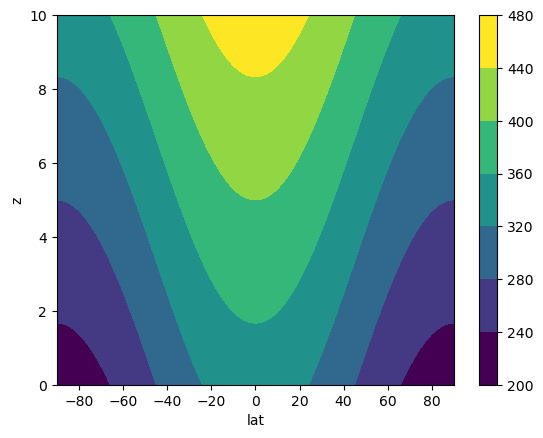

In [3]:
latarray = np.linspace(-90,90,181)
lat = xr.DataArray(latarray, coords={'lat': latarray})
phi = np.deg2rad(lat)

zarray = np.linspace(0,H)
z = xr.DataArray(zarray, coords={'z': zarray})

theta_eq = theta0*(1-DeltaH*np.sin(phi)**2 + DeltaV*(z/H-1/2))
theta_eq.plot.contourf(x='lat')

### Boundary conditions

At the tropopause $z=H$ we apply *no-flow* and *free-slip* conditions:

\begin{align*}
w(H) &= 0 \\
\frac{\partial \theta}{\partial z}\Big|_{z=H} &= 0 \\
\frac{\partial u}{\partial z}\Big|_{z=H} & = 0 \\
\frac{\partial v}{\partial z}\Big|_{z=H} & = 0 
\end{align*}

At the surface, we apply *no-flow* and a simple Rayleigh drag condition:

\begin{align*}
w(0) &= 0 \\
\frac{\partial \theta}{\partial z}\Big|_{z=0} &= 0 \\
\nu\frac{\partial u}{\partial z}\Big|_{z=0} & = c u \\
\nu\frac{\partial v}{\partial z}\Big|_{z=0} & = c v 
\end{align*}

Finally, we impose *interhemispheric symmetry* -- no cross-equatorial flow:

$$ v = 0  $$

at $\phi = 0$.

## Frictional solution: pure radiative-convective equilibrium

First, let's look at the case of a purely frictionless / non-turbulent flow where

$$\nu = 0$$

A solution to the governing equations exists for which the flow is purely zonal with no overturning:

\begin{align*}
u &= u_{eq} \\
v &= 0 \\
w &= 0
\end{align*}

In such a case, the thermodynamic equation tells us that 

$$ \theta = \theta_{eq} $$

everywhere, i.e. the atmosphere is in a state of radiative-convective equilibrium.

### Solving for the zonal wind profile

We would like to see what this model predicts for the vertical and meridional profile of the zonal wind $u_{eq}$ in the radiative-convective equilibrium state.

The meridional momentum equation becomes

$$ f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} = -\frac{1}{a} \frac{\partial \Phi}{\partial \phi} $$

Deriving a thermal wind equation by taking the vertical derivative and using hydrostatic balance:

$$\frac{\partial}{\partial z} \left( f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} \right) = -\frac{g}{a \theta_0} \frac{\partial \theta_{eq}}{\partial \phi}$$

From the definition of $\theta_{eq}$ we get

$$\frac{\partial \theta_{eq}}{\partial \phi} = -2\Delta_H \theta_0 \sin\phi \cos\phi $$

So, integrating the thermal wind equation in the vertical and applying the boundary condition $u_{eq}(0) = 0$, we get

$$f u_{eq} + \frac{u_{eq}^2 \tan\phi}{a} = \frac{2 g \Delta_H}{a} \sin\phi \cos\phi z$$

which is a quadratic equation in $u_{eq}$ that we can solve:

$$u_{eq} = \Omega a \cos\phi \left( \sqrt{1 + \frac{2 z}{H} \left(\frac{g H \Delta_H}{(\Omega a)^2}\right)} - 1 \right)$$

... more to come

### Profile of absolute angular momentum

$$M_eq = \Omega a^2 \cos^2\phi \sqrt{1 + \frac{2z}{H} R_{OT}}$$

In [4]:
sidereal_day = 86164.0905  # in seconds -- we definitely don't need this accuracy but hey
a = 6.373E6      # Radius of Earth (m)
Omega = 2*np.pi / sidereal_day
uT = 100. # tropopause-level wind speed in m/s -- order of magnitude estimate

# The temporal Rossby number
RoT = uT / Omega / a
RoT

0.2151803062936203

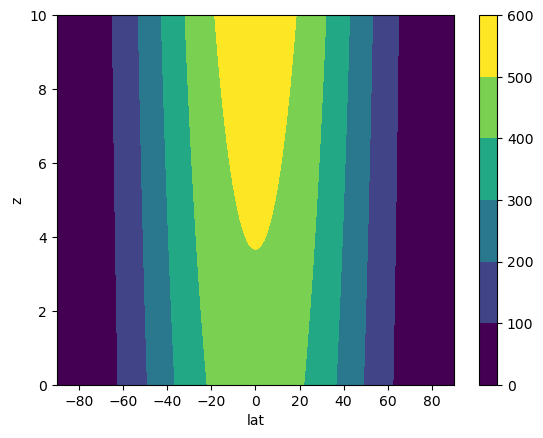

In [5]:
Meq = Omega*a*np.cos(phi)**2 * np.sqrt(1+2*z/H*RoT)
Meq.plot.contourf(x='lat')

The key point here is the existence of a local maximum of absolute angular momentum away from the surface, which cannot exist in a fluid with any viscosity at all.

... more to come in these notes

## Extensions of the zonally symmetric theory

### Effects of moisture

We made a severe simplication of the dynamics of the equatorial region by ignoring the latent heating due to condensation in our thermodynamic equation. Is it possible to extend the zonally symmetric, angular-momentum-conserving theory to account for the fact that condensation is large in our upward branch of the circulation?

Vallis discusses this in section 14.2.7 of his "big book" (2nd edition) {cite}`Vallis:bigbook2`. 

We suppose the Hadley cell circulation represents a closed system for water, in which the latent heating by condensation in the upward branch is exactly balanced by the energy required to evaporate water off the surface. This represents an additional energy redistribution process within the cell, but the cell must still conserve energy so that

$$\int_0^{\phi_H} <\theta> \cos\phi d\phi = \int_0^{\phi_H} <\theta_{eq}> \cos\phi d\phi$$

still holds.

To actually solve a model like this, we would need to make the equilibrium profile $\theta_{eq}$ a function of the circulation itself, making the problem non-linear and substantially more complicated.

The basic idea is that $\theta_{eq}$ would now have a strong peak near the equator. As a consequence, the heating profile $\theta - \theta_{eq}$ would have a strong equator-to-subtropical gradient, and the resulting Hadley circulation must therefore be stronger.

Another consequence (borne out by numerical modeling) is that the upward branch of the moist Hadley circulation should become much narrower and more intense.

:::{figure-md} markdown-fig
<img src="../images/Vallis_fig14.8.pdf" alt="Schema of the effects of moisture on a model of the Hadley Cell" width="600px">

Source: {cite:t}`Vallis:bigbook2` (Figure 14.8 of the 2nd edition). Note that in Vallis's notation, $\theta_{E}$ is the dry radiative equilibrium temperature and $\theta_{E}^*$ is the moist radiative equilibrium.
:::

### Effects of seasonality

Observations show that the circulation is dominated by a single winter cell, and rising motion in the summer hemisphere near the soltices.

The zonally symmetric theory was extended to the case where the heating is centered off the equator at a latitude $\phi_0$ by {cite:t}`Lindzen:1988gc`. This is reviewed in Section 14.4 of {cite:t}`Vallis:bigbook2`:

:::{figure-md} markdown-fig
<img src="../images/Vallis_fig14.9.pdf" alt="Schematic of a Hadley circulation model when the heating is centered off the equator" width="600px">

Source: {cite:t}`Vallis:bigbook2` (Figure 14.9 of the 2nd edition).
:::

A solution is possible following similar procedures but applying multiple boundary conditions. 

The structure of the temperature field becomes

$$ <\theta>(\phi) - <\theta>(\phi_1) = -\frac{\theta_0 \Omega^2 a^2}{2 g H} \frac{(\sin^2\phi - \sin^2)^2}{\cos^2\phi}$$

:::{figure-md} markdown-fig
<img src="../images/Vallis_fig14.10.pdf" alt="Solutions of a Hadley circulation model when the heating is centered off the equator" width="600px">

Source: {cite:t}`Vallis:bigbook2` (Figure 14.10 of the 2nd edition).
:::

The solution shows that the circulation in the winter hemisphere is much stronger, at least qualitatively consistent with observations. See {cite:t}`Dima:2003a` for a critical discussion.

## Does the upper branch actually conserve angular momentum?

The simple models we've looked at here all rest of the basic assumption that there are no eddies in the flow, and that (therefore) the poleward flowing branch conserves its absolute angular momentum.

Let's take a quick look at reanalysis data, using our [pre-computed monthly climatologies](https://brian-rose.github.io/general-circulation/lectures/computing-seasonal.html) of the CFSR data.

### Calculate the overturning streamfunction

Repeating here some code from our notes on the [Observed circulation](https://brian-rose.github.io/general-circulation/lectures/observed-circulation.html#mass-overturning-circulation) to calculate the mass climatological overturning streamfunction $\psi$, defined by

\begin{align*}
2\pi a \cos\phi [\overline{v}] &= \frac{\partial \psi}{\partial p} \\
2\pi a^2 \cos\phi \left( [\overline{\omega}]\right) = -\frac{\partial \psi}{\partial \phi}
\end{align*}


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from climlab.utils.constants import a, g

local_path = '/nfs/roselab_rit/data/cfsr_climatology/'
path = local_path

cfsr_mon = xr.open_mfdataset(path + '*' + '.mon_clim.0p5.nc')

In [7]:
vbracket = cfsr_mon.v.mean(dim='lon')
vbracket_zeros = vbracket.fillna(0.)
coslat = np.cos(np.deg2rad(cfsr_mon.lat))
# Use units of 10^9 kg/s
psi = 2*np.pi*a*coslat/g * vbracket_zeros.cumulative_integrate(coord='lev') / 1E9 * 100
# Need to multiply by 100 because the 'lev' coordinate is in units of hPa, not Pa

### Calculate the absolute angular momentum

Following our [angular momentum notes](https://brian-rose.github.io/general-circulation/lectures/angular-momentum-budget.html), we can easily calculate the climatological absolute angular momentum:

$$ M = \Omega a^2 \cos^2\phi + u a \cos\phi $$

In [8]:
sidereal_period = (23*60 + 56)*60 + 4.09053  # Earth's rotational period in seconds -- just shy of one day
Omega = 2*np.pi / sidereal_period  # Earth's angular rotation rate (radians / second)

Mplanetary = Omega * a**2 * coslat / 1E7 # put in units of 10^6 m^2 s^-1
Mplanetary.attrs['long_name'] = 'planetary angular momentum'

ubracket = cfsr_mon.u.mean(dim='lon')

Mrelative = ubracket * a * coslat / 1E7
Mrelative.attrs['long_name'] = 'relative angular momentum'

Mabsolute = Mplanetary + Mrelative
Mabsolute.attrs['long_name'] = 'aboslute angular momentum'

for M in [Mplanetary, Mrelative, Mabsolute]:
    M.attrs['units'] = '10^7 m^2 s^-1'

### Make a plot of the overturning circulation overlain on the angular momentum contours

We will plot the seasonal extremes December and January

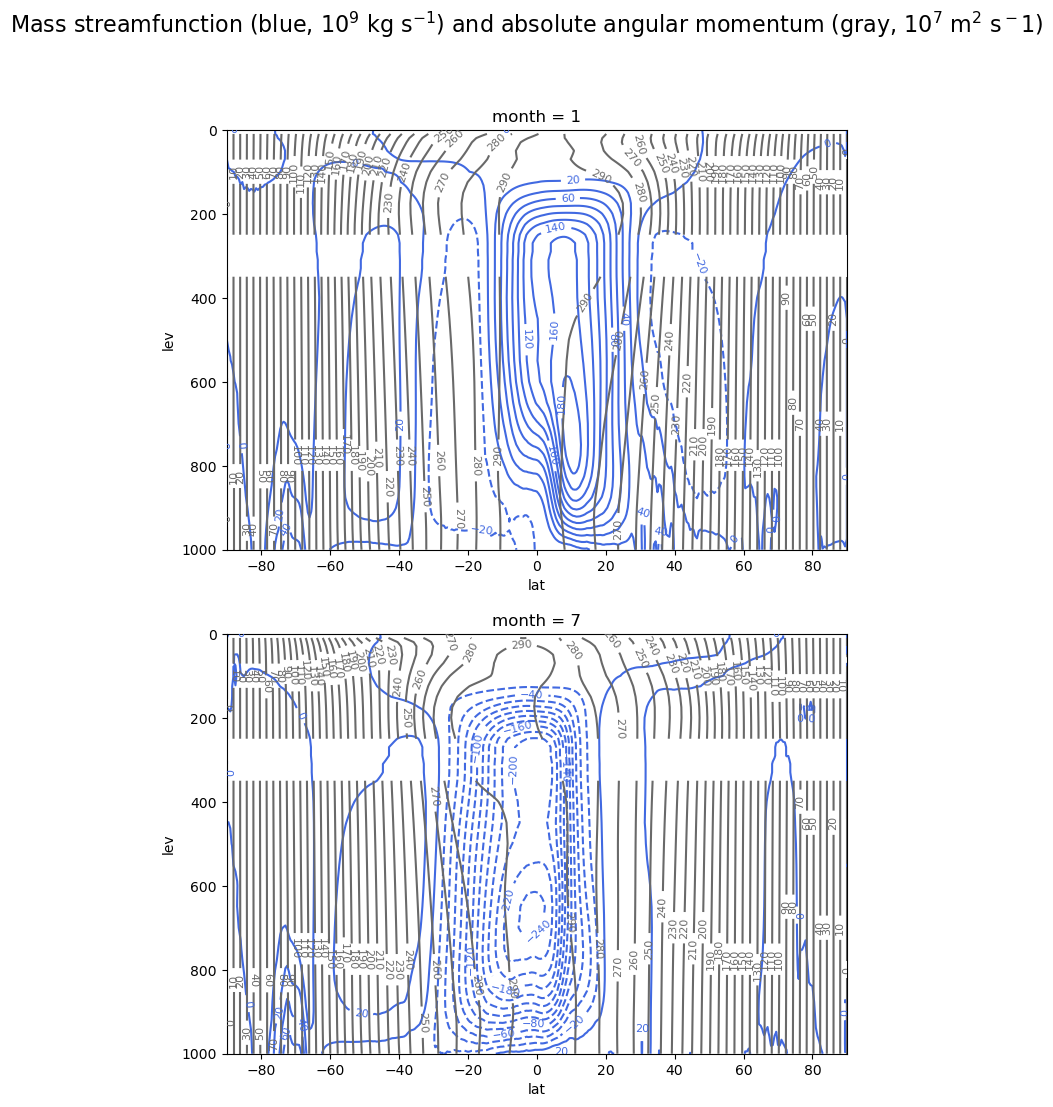

In [9]:
psi_levels = np.arange(-240, 250, 20.)
M_levels = np.arange(0, 300, 10.)

fig, axes = plt.subplots(2,1, figsize=(8,12))

ax = axes[0]

for ind, month in enumerate([1,7]):
    ax = axes[ind]
    CSpsi = psi.sel(month=month).plot.contour(ax=ax,
                                       x='lat', 
                                       yincrease=False,
                                       levels=psi_levels,
                                       colors='royalblue',
                                            )
    ax.clabel(CSpsi, CSpsi.levels, inline=True, fontsize=8)

    CSm = Mabsolute.sel(month=month).plot.contour(ax=ax,
                                       x='lat', 
                                       yincrease=False,
                                       levels=M_levels,
                                       colors='dimgray',
                                            )
    ax.clabel(CSm, CSm.levels, inline=True, fontsize=8)

fig.suptitle('Mass streamfunction (blue, 10$^9$ kg s$^{-1}$) and absolute angular momentum (gray, 10$^7$ m$^2$ s$^-1$)', fontsize=16);

Notice how the $M$ contours "bulge out" in the poleward direction in the upper troposphere, especially in the subtropics of the winter hemisphere!

This suggests that the observed circulation does advect high equatorial $M$ poleward and to some extent conserves $M$ in the poleward branch. But a truly conservative circulation would not cross any $M$ contours.

We can see in these figures that the blue $\psi$ contours do indeed cross gray $M$ contours in the upper branches, indicating that **zonal-mean angular momentum is not really conserved** in these circulations.

This, in turn, suggests an important role for the eddies that we have so far neglected.

## Effects of eddies on the Hadley cell: qualitative and diagnostic arguments

### Eddies in the angular momentum budget

Let's write a zonally averaged angular momentum equation including the (so-far) neglected eddy terms. 

Start from absolute angular momentum conservation

$$ \frac{DM}{Dt} = 0 $$

and write in flux form. If we take the zonal average, we get flux contributions from the mean meridional circulation $[v][M]$ and the zonal eddy flux $[v^* M^*]$. The equation then looks like

$$ \frac{\partial [M]}{\partial t} + \frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [v] [M] \cos\phi ) + \frac{\partial}{\partial z} ([w][M]) = -\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [v^* M^*] \cos\phi ) - \frac{\partial}{\partial z} ( [w^*M^*])$$

where we moved the eddy flux terms over to the RHS of the equation **because we are treating the eddies are forcing on the zonal mean flow**.

For simplicity here we'll stay in the Boussinesq framework, and we'll ignore the vertical flux entirely.

Since the absolute angular momentum is related to the zonal wind

$$ M = \Omega a^2 \cos^2 \phi + u a \cos\phi $$

the eddy momentum flux $[v^*M^*]$ can be written as $[u^* v^*] a \cos\phi$, and so our equation becomes

$$ \frac{\partial [M]}{\partial t} + \frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [v] [M] \cos\phi ) = -\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [u^* v^*] a \cos^2\phi ) $$

or, since the Boussinesq fluid is non-divergent and we are ignoring vertical fluxes, we can also write this as

$$ \frac{\partial [M]}{\partial t} + \frac{[v]}{a \cos\phi} \frac{\partial}{\partial \phi} ( [M] \cos\phi ) = -\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [u^* v^*] a \cos^2\phi ) $$

This shows that regions where the eddy momentum flux *diverges*, the eddies tend to reduce the zonal-mean angular momentum $[M]$. Conversely, the eddies tend to increase $[M]$ where the eddy momentum flux is convergent.

### The observed eddy momentum flux

Let's plot the eddy momentum flux $[u^* v^*] \cos\phi$ for the month of January to get a sense of how the observed circulation must be affecting the angular momentum of the winter-season Hadley cell:

In [10]:
cfsr_path = '/cfsr/data/'
year = '2021'

u_ds = xr.open_dataset(cfsr_path + year + '/u.' + year + '.0p5.anl.nc', chunks={"time": 30, "lev": 4})
v_ds = xr.open_dataset(cfsr_path + year + '/v.' + year + '.0p5.anl.nc', chunks={"time": 30, "lev": 4})

In [11]:
u_6hourly = u_ds.u
v_6hourly = v_ds.v

In [12]:
def bracket(data):
    return data.mean(dim='lon', skipna=True)

def star(data):
    return data - bracket(data)

def bar(data, interval=u_ds.time.dt.month):
    return data.groupby(interval).mean(skipna=True)

def prime(data, interval=u_ds.time.dt.month):
    return data.groupby(interval) - bar(data, interval=interval)

In [13]:
momentumflux = bracket(star(u_6hourly)*star(v_6hourly)) * coslat
momentumflux

,Array,Chunk
Bytes,64.34 MiB,169.22 kiB
Shape,"(1460, 32, 361)","(30, 4, 361)"
Count,19 Graph Layers,392 Chunks
Type,float32,numpy.ndarray


In [14]:
momentumflux_jan = bar(momentumflux).sel(month=1).load()
momentumflux_jan.attrs['long_name'] = 'Northward eddy flux of angular momentum'
momentumflux_jan.attrs['units'] = 'm^2 s^-2'

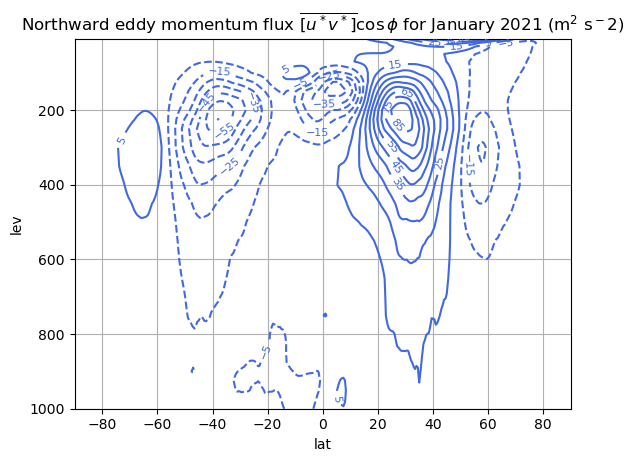

In [15]:
fig, ax = plt.subplots()

momflux_levels = np.arange(-75, 90, 10.)
CS = momentumflux_jan.plot.contour(x='lat',
                                   yincrease=False,
                                   levels=momflux_levels,
                                   colors='royalblue',
                                  )
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.grid()
ax.set_title('Northward eddy momentum flux $\overline{[u^* v^*]} \cos\phi$ for January 2021 (m$^2$ s$^-2$)');

Evidently the eddy momentum flux increases from equator to a maximum at about 30º in the winter hemisphere, so the RHS of our angular momentum equation is negative across the tropics. 

Thus if $[v] >0$ (as it is in the upper branch of the Hadley cell) and the flow is steady, then zonal mean angular momemtum $[M]$ must *decrease* as it moves poleward!

The zonal velocity $[u]$ must be less than it would be in the absence of the observed eddies.

### Thermodynamic effects of eddies

Let's write a zonally-averged thermodynamic equation for the Boussinesq system, again neglecting vertical fluxes (or if you prefer, taking the vertical average):

$$ \frac{\partial [b]}{\partial t} +\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [v][b]\cos\phi) = -\frac{1}{a \cos\phi} \frac{\partial}{\partial \phi} ( [v^* b^*]\cos\phi) + \dot{Q} $$

where $\dot{Q}$ is a diabatic heating.

This equation shows that the eddy heat flux divergence has the same effect on the zonal-mean fields as a diabatic heating.

Let's take a look at the observed eddy heat flux.

In [16]:
T_ds = xr.open_dataset(cfsr_path + year + '/t.' + year + '.0p5.anl.nc', chunks={"time": 30, "lev": 4})
T_6hourly = T_ds.t

In [17]:
heatflux = bracket(star(T_6hourly)*star(v_6hourly)) * coslat

In [18]:
heatflux_jan = bar(heatflux).sel(month=1).load()
heatflux_jan.attrs['long_name'] = 'Northward eddy heat flux'
heatflux_jan.attrs['units'] = 'K m^1 s^-1'

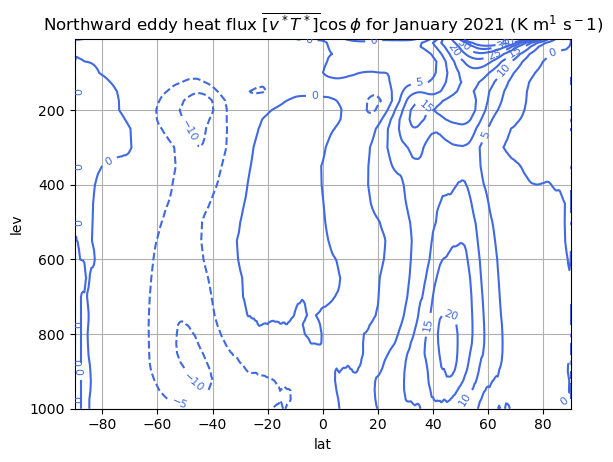

In [19]:
fig, ax = plt.subplots()

heatflux_levels = np.arange(-40, 45, 5.)
CS = heatflux_jan.plot.contour(x='lat',
                                   yincrease=False,
                                   levels=heatflux_levels,
                                   colors='royalblue',
                                  )
ax.clabel(CS, CS.levels, inline=True, fontsize=8)
ax.grid()
ax.set_title('Northward eddy heat flux $\overline{[v^* T^*]} \cos\phi$ for January 2021 (K m$^1$ s$^-1$)');

The eddy heat flux is predominantly poleward, showing that eddies export heat from the subtropics to higher latitudes.

Evidently the observed flux is *divergent* over the subtropical edge of the Hadley cell. The eddies are thus creating a *steeper meridional heating gradient* across the Hadley cell and acting to *increase the intensity of the overturning*.

## An idealized eddy-driven Hadley cell model

We can more formally quantify the above arguments into a model for the Hadley circulation in the purely eddy-driven limit. 

So we will now write down equations where we neglect meridional fluxes by the mean flow (like $[u][v]$) and instead include the eddy fluxes (such as $[u^* v^*]$.

### Zonally averaged Boussinesq equations

Keeping things simple, we will continue to use Boussinesq equations, ignore vertical fluxes, and also ignore the curvature terms in the momentum equation.

#### Momentum 

A zonally averaged zonal momentum equation in this regime looks like

$$ \frac{D[u]}{Dt} - f[v] = 0$$

or, writing out the material derivative in flux form and moving things over to the RHS,

\begin{align*}
\frac{\partial [u]}{\partial t} &= f[v] -\frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} ([u^*v^*] \cos\phi) \\
&= f[v] - J_u 
\end{align*}

defining an eddy source term $J_u$ that we will be using shortly.

#### Thermodynamics

A corresponding thermodynamic equation is

$$ \frac{D[b]}{Dt} + N^2 [w] = 0 $$

where we are assuming a fixed mean stratification $N^2$ -- as we do in the quasigeostrophic approximation.

Expanding the same way as we did above with the momentum equation, we can write

\begin{align*}
\frac{\partial [b]}{\partial t} &= -N^2 [w] -\frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} ( [v^* b^*] \cos\phi ) \\
&= -N^2 [w] - J_b
\end{align*}

defining an eddy heat flux source term $J_b$

### Derivation of a balanced overturning circulation

#### Thermal wind

We can use geostrophic balance

$$ f[u] = -\frac{1}{a} \frac{\partial [\Phi]}{\partial \phi} $$

and hydrostatic balance

$$ \frac{\partial [\Phi]}{\partial z} = [b] $$

to define a thermal wind relation

$$ f \frac{\partial [u]}{\partial z} = -\frac{1}{a} \frac{\partial [b]}{\partial \phi} $$

Now take time derivatives of both sides of the thermal wind equation, and substitute in from our momentum and thermodynamic equations to get

$$ f^2 \frac{\partial [v]}{\partial z} - \frac{N^2}{a} \frac{\partial [w]}{\partial \phi} = f \frac{\partial J_u}{\partial z} + \frac{1}{a} \frac{\partial J_b}{\partial \phi}$$

#### Define the overturning streamfunction

Define $\psi$ so that a positive value is clockwise in the $(\phi, z)$ plane:

\begin{align*}
[v] &= -\frac{1}{a\cos\phi} \frac{\partial \psi}{\partial z} & [w] &= +\frac{1}{a^2 \cos\phi} \frac{\partial \psi}{\partial \phi}
\end{align*}

Then we have an equation for $\psi$ from our thermal wind relation that looks like

$$ -\frac{f^2}{a\cos\phi} \frac{\partial^2 \psi}{\partial z^2} - \frac{N^2}{a^3 \cos\phi} \frac{\partial^2 \psi}{\partial \phi^2} = f \frac{\partial J_u}{\partial z} + \frac{1}{a} \frac{\partial J_b}{\partial \phi}$$

This is a 2nd order PDE for $\psi$ that's potentially solvable, subject to boundary conditions and known eddy forcings $J_u, J_b$.

In fact the LHS of equation is essentially $-\nabla^2 \psi$, from which we can infer that the LHS is proportional to $\psi$ itself.

So the equation has the form

$$\psi \propto f \frac{\partial J_u}{\partial z} + \frac{1}{a} \frac{\partial J_b}{\partial \phi}$$

This tells us two things:

1. an increased vertical gradient of eddy momentum flux divergence wil act to increase $\psi$
2. an increased horizontal gradient of eddy heat flux divergence will also act to increase $\psi$

When we looked at the observed fluxes in the winter hemisphere, we found that both forcing terms are positive.

We conclude that during winter, the eddies are driving a stronger Hadley cell.

## Summary of Hadley cell results

We have two entirely different models of the zonally-averaged overturning circulation:

The _**angular-momentum-conserving model**_ in which
- $<\theta>$ is determined by $M$ conservation only
- $M$ is constant on the poleward branch
- Strength of the Hadley circulation is a function of $R_{OT}$

and the _**eddy-driven model**_ in which
- $<\theta>$ is modified by eddy heat fluxes
- $M$ decreases in the region of eddy momentum flux divergence
- Strength of the Hadley circulation is controlled by the eddies themselves

In reality both sets of processes play a role. Reality is somewhere in between.

## The mid-latitude Ferrel cell

Let's take one more look at the observed overturning during a solstice season:

Text(0.5, 1.0, 'Mass overturning streamfunction for January (Sv)')

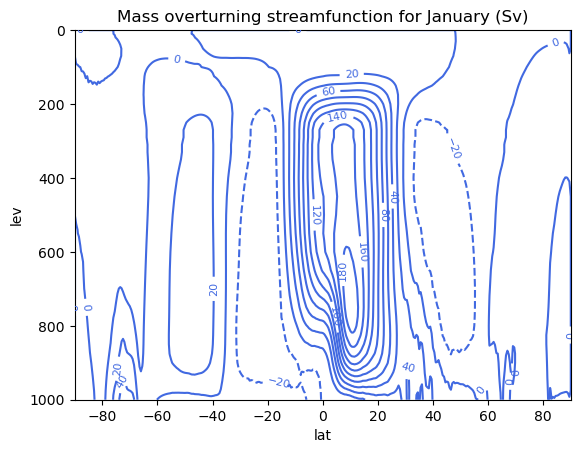

In [35]:
fig, ax = plt.subplots()
CSpsi = psi.sel(month=1).plot.contour(ax=ax,
                                       x='lat', 
                                       yincrease=False,
                                       levels=psi_levels,
                                       colors='royalblue',
                                            )
ax.clabel(CSpsi, CSpsi.levels, inline=True, fontsize=8);
ax.set_title('Mass overturning streamfunction for January (Sv)')

The observed streamfunction shows a *thermally indirect* cell in mid-latitudes in both hemispheres; that is, cool air rises in the sub-polar latitudes, moves equatorward, and sinks in the subtropics. 

_Why does such a circulation exist?_

### Basic argument for equatorward flow in the upper branch

The proximate answer to the "why" question is actually very simple so long as we take the eddy fluxes as given.

Consider the zonally averaged momentum equation we wrote down above:

\begin{align*}
\frac{\partial [u]}{\partial t} &= f[v] -\frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} ([u^*v^*] \cos\phi) \\
&= f[v] - J_u 
\end{align*}

If the circulation is in *steady state* then we must have a balance

$$ f[v] = J_u $$

In other words, the Coriolis force on the mean meridonal flow balances the eddy momentum flux divergence.

Our plot above of the eddy momentum flux $[u^*v^*] \cos\phi$ showed that is decreases poleward of the subtropical maximum. So the momentum flux is *convergent* in the mid-latitudes -- the eddies are extracting westerly momentum from the subtropics and exporting it to the mid-latitudes.

Thus $J_u = \frac{1}{a\cos\phi} \frac{\partial}{\partial \phi} ([u^*v^*] \cos\phi) < 0$ in the mid-latitudes, and so we must have $[v]<0$ (equatorward) in order to produce the necessary westward zonal-mean Coriolis force.

### The role of surface friction

Mass conservation dictates that the flow cannot be equatorward at all levels. Also the observed momentum fluxes are much smaller near the surface.

Clearly a different force balance must be at work near the surface that constrains the poleward branch of the Ferrel cell.

The answer is, of course, friction.

Recall that surface friction typically affects the atmosphere through a turbulent boundary layer known as an **Ekman layer**. The dominant near-surface wind in the mid-latitudes is zonal and westerly, i.e. $[u_s]>0$ (where the subscript $s$ is for "surface". This results in an Ekman transport at 90º to the surface frictional stress. The surface friction effectively "pushes" air poleward so that $[v_s] > 0$.

This situation is sketch in Vallis's Figure 14.17:

:::{figure-md} markdown-fig
<img src="../images/Vallis_fig14.17.pdf" alt="The eddy-driven Ferrel Cell, from an Eulerian point of view" width="600px">

Source: {cite:t}`Vallis:bigbook2` (Figure 14.17 of the 2nd edition). 
:::

### Final word

Hopefully this discussion makes clear that the eddy fluxes of heat and momentum play a major role in the mid-latitude circulation.

What we've offered here is a *description* of the zonal-mean balances, given the observed eddy fluxes. A complete theory of the general circulation needs to explain why those eddy fluxes exist and why they have the shape and size that we observe.